# Sam Rabin's utility example notebook for 1-d files

Contains code to show example uses of the functions I add to utils.py which are designed to work with 1-dimensional (i.e., not lat-lon gridded) CTSM output data.

Questions or comments? Email me: sam dot rabin at gmail dot com.

## Define useful variables

You will need to customize these to work with your system and data.

In [1]:
# Your path to ctsm_py directory (i.e., where utils.py lives)
my_ctsm_python_gallery = "/Users/sam/Documents/git_repos/ctsm_python_gallery_myfork/ctsm_py/"

# Directory where input file(s) can be found
indir = "/Volumes/Reacher/CESM_runs/f10_f10_mg37/"

# Either the name of a file within $indir, or a pattern that will return a list of files.
pattern = "*h1.*-01-01-00000.nc"

# List of variables to import from file(s) in $indir matching $pattern. Additional variables will be imported as necessary if they will be useful in gridding any of these. So, e.g., since CPHASE 
myVars = ["CPHASE", \
          "GDDHARV", 
          "GDDPLANT", 
          "GPP", 
          "GRAINC_TO_FOOD", 
          "NPP", 
          "TLAI", 
          "TOTVEGC"]

## Import CTSM utils module

In [2]:
import sys
sys.path.append(my_ctsm_python_gallery)
import utils

## Import a dataset.

- Set `myVars=None` to import all variables.
- Currently, the `myVegtypes` argument will import only patches with vegetation types that are managed crops. Set `myVegTypes=None` to import all patches. You can also set `myVegTypes=some_list` to import only patches with any of some arbitrary list of vegetation types.

In [3]:
import glob

# Get list of all files in $indir matching $pattern
filelist = glob.glob(indir + pattern)

# Import
this_ds = utils.import_ds(filelist, myVars=myVars, myVegtypes=utils.define_mgdcrop_list())
this_ds

<xarray.Dataset>
Dimensions:                  (patch: 1376, levgrnd: 25, levsoi: 20, levlak: 10, levdcmp: 25, time: 762, lon: 24, lat: 19, ivt: 79)
Coordinates:
  * patch                    (patch) int64 547 548 549 550 ... 4716 4733 4734
  * levgrnd                  (levgrnd) float32 0.01 0.04 0.09 ... 28.87 42.0
  * levsoi                   (levsoi) float32 0.01 0.04 0.09 ... 5.95 6.94 8.03
  * levlak                   (levlak) float32 0.05 0.6 2.1 ... 25.6 34.33 44.78
  * levdcmp                  (levdcmp) float32 0.01 0.04 0.09 ... 28.87 42.0
  * time                     (time) object 2000-01-01 00:00:00 ... 2002-02-01...
  * lon                      (lon) float32 0.0 15.0 30.0 ... 315.0 330.0 345.0
  * lat                      (lat) float32 -90.0 -80.0 -70.0 ... 70.0 80.0 90.0
  * ivt                      (ivt) int64 0 1 2 3 4 5 6 ... 72 73 74 75 76 77 78
Data variables: (12/24)
    patches1d_lon            (patch) float64 dask.array<chunksize=(1376,), meta=np.ndarray>
    patches1d_lat            (patch) float64 dask.array<chunksize=(1376,), meta=np.ndarray>
    patches1d_ixy            (patch) float64 dask.array<chunksize=(1376,), meta=np.ndarray>
    patches1d_jxy            (patch) float64 dask.array<chunksize=(1376,), meta=np.ndarray>
    patches1d_gi             (patch) float64 dask.array<chunksize=(1376,), meta=np.ndarray>
    patches1d_li             (patch) float64 dask.array<chunksize=(1376,), meta=np.ndarray>
    ...                       ...
    GRAINC_TO_FOOD           (time, patch) float32 dask.array<chunksize=(365, 1376), meta=np.ndarray>
    NPP                      (time, patch) float32 dask.array<chunksize=(365, 1376), meta=np.ndarray>
    TLAI                     (time, patch) float32 dask.array<chunksize=(365, 1376), meta=np.ndarray>
    TOTVEGC                  (time, patch) float32 dask.array<chunksize=(365, 1376), meta=np.ndarray>
    vegtype_str              (ivt) <U35 'not_vegetated' ... 'irrigated_tropic...
    patches1d_itype_veg_str  (patch) <U35 'temperate_corn' ... 'rice'
Attributes: (12/99)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 10/19/21 16:32:21
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_irrigated_switchgrass:            60
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     day_1

## Extract one variable from that dataset

In [4]:
# Which variable? CPHASE = crop development phase.
thisVar = "CPHASE"

thisvar_da = utils.get_thisVar_da(thisVar, this_ds)
thisvar_da

<xarray.DataArray (time: 762, patch: 1376)>
array([[2., 2., 3., ..., 4., 4., 4.],
       [2., 2., 3., ..., 4., 4., 4.],
       [2., 2., 3., ..., 4., 4., 4.],
       ...,
       [2., 2., 3., ..., 4., 4., 4.],
       [2., 2., 3., ..., 4., 4., 4.],
       [2., 2., 3., ..., 4., 4., 4.]], dtype=float32)
Coordinates:
  * time     (time) object 2000-01-01 00:00:00 ... 2002-02-01 00:00:00
  * patch    (patch) int64 547 548 549 550 573 574 ... 4625 4715 4716 4733 4734

## Make a map of one timestep of some variable

- Can also specify `thisTime` as an integer (index on `time` dimension).
- (I want to rework this to use `xarray`'s built-in plotting functions.)



/Users/sam/Applications/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
/Users/sam/Applications/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


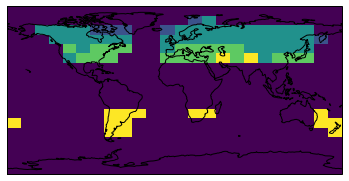

In [5]:
# Which variable, which vegetation type, and when? CPHASE = crop development phase.
thisVar = "CPHASE"
thisVegtype = "temperate_corn"
thisTime = "2000-07-01"

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Extract and grid the variable
thisVar_da_gridded = utils.grid_one_variable(this_ds, thisVar, time=thisTime)

# Make map
thisVar_da_gridded = thisVar_da_gridded.sel(ivt_str=thisVegtype)
if thisVar_da_gridded.shape[0] == 1:
    thisVar_da_gridded = thisVar_da_gridded.squeeze()
else:
    raise ValueError("You must select one time step to plot")
thisVar_da_gridded = utils.cyclic_dataarray(thisVar_da_gridded)
ax = plt.axes(projection=ccrs.PlateCarree())
plt.pcolor(thisVar_da_gridded.lon.values, thisVar_da_gridded.lat.values, thisVar_da_gridded, transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()